In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.shape

(8124, 23)

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

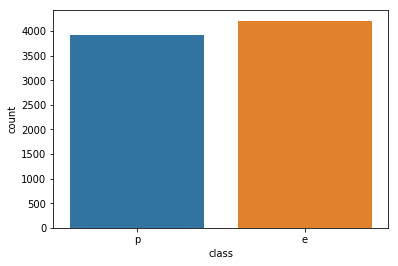

In [7]:
sns.countplot(df['class'])

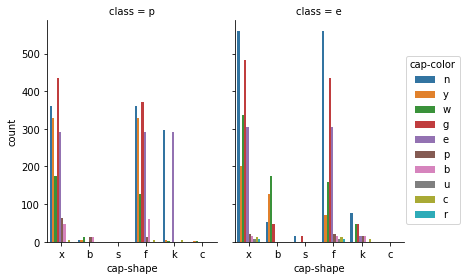

In [15]:
plt.figure(figsize = (14,6))
g = sns.factorplot(x="cap-shape", hue="cap-color", col="class",
                data=df, kind="count",
                aspect=.7);

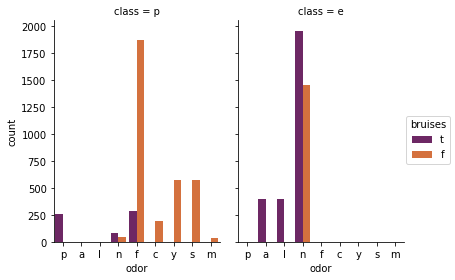

In [16]:
plt.figure(figsize = (14,6))
g = sns.factorplot(x="odor", hue="bruises", col="class",
                data=df, kind="count",
                aspect=.7 , palette = 'inferno');

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)   
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [18]:
x = df.drop(['class'] , axis = 1)
y = df['class']

In [19]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 0)

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0 , max_depth = 5)
dt.fit(x_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [21]:
dt.score(x_train , y_train)

0.9778403095321843

In [23]:
predictions = dt.predict(x_test)
predictions

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , predictions)

0.9827727645611156

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)

In [26]:
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

0.9910306014773127

In [27]:
predictions = rf.predict(x_test)
rf.score(x_test , y_test)

0.9913863822805579

In [28]:
accuracy_score(y_test , predictions)

0.9913863822805579

In [29]:
from sklearn.externals import joblib
joblib.dump(rf,'Mushroommodel.obj')

['Mushroommodel.obj']